# Creating a network graph from ESTC imprint statements
This notebook creates a network graph based on the publishing personnel who appear in the imprint statements from ESTC records associated with William Bowyer from the year 1730.

## A - How did I get these names?
While some ESTC records do have the names of publishing personnel in "added entries" fields, this is not widespread enough to rely on. To get the names from the imprint fields for use as nodes in a network graph, I used [Doccano](https://github.com/doccano/doccano) to highlight and annotate the people and organizations in the imprint records.

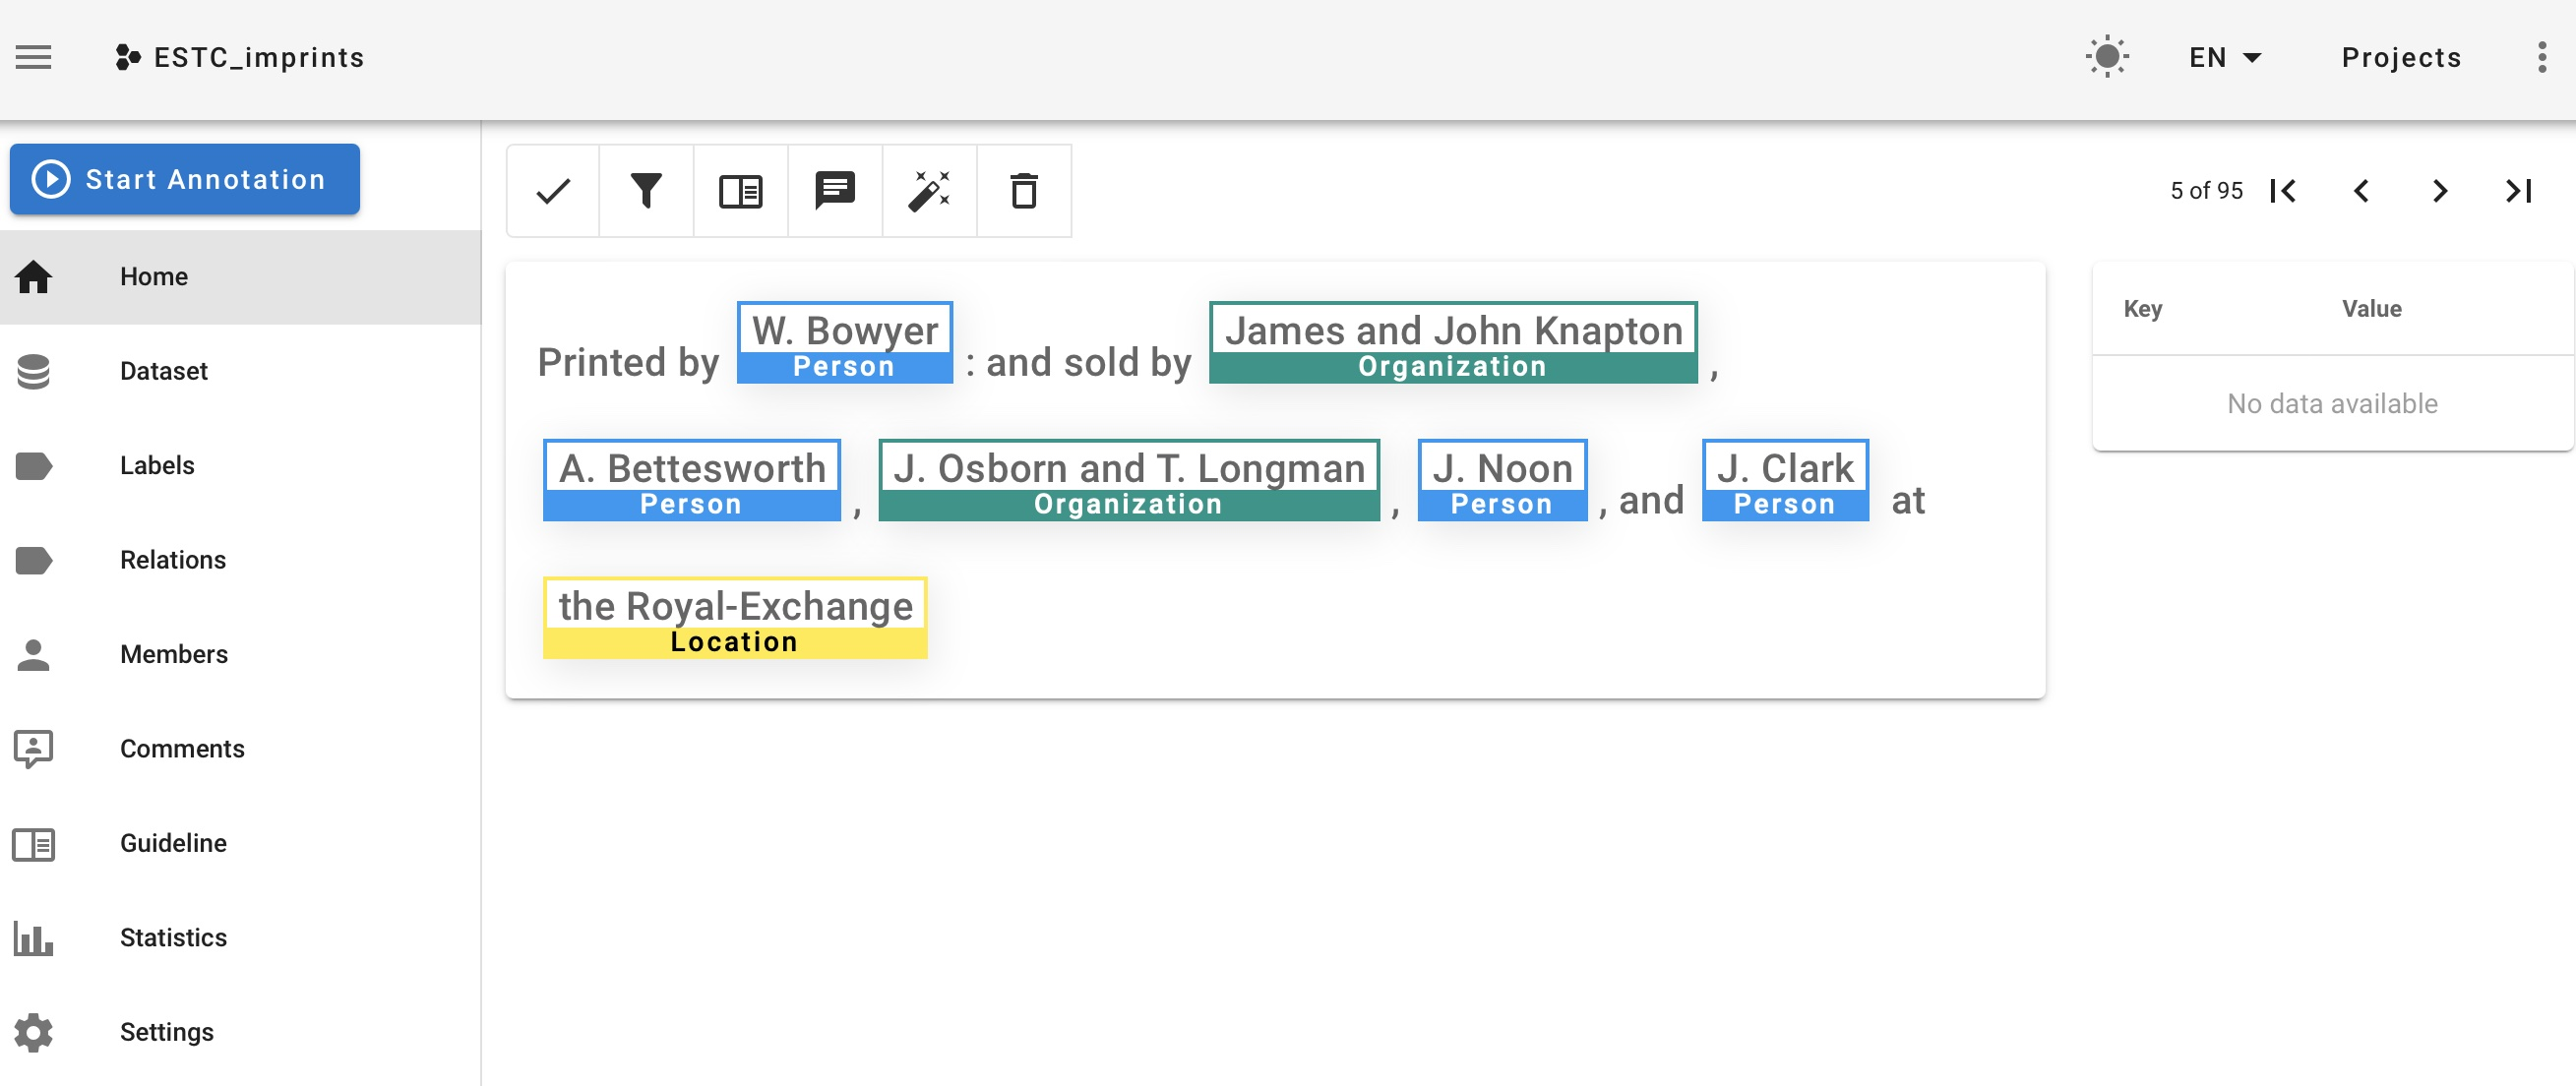

Doccano is a tool designed for annotating text for use in training machine learning models. If I were working with a larger sample, it could be worth training a natural language processing library like [spaCy](http://spacy.io) to recognize the forms that names take in these imprint statements. As I was working with such a small set of records, though, it really didn't take too much time to annotate all of the imprint statements in Doccano and use its output to get the names I had just annotated out of the imprint statements.

There isn't really a way to run Doccano from a Colaboratory notebook, and I'm unable to find a demo installation online that would allow you to upload and annotate texts of your own. If you're interested in trying out Doccano, there is a Docker image available that can allow you to get up and running very quickly, if you're comfortable working with Docker. (Installing Docker is beyond the scope of this exercise, but if this strikes you as something you might want to do for a real project, we can discuss the steps involved—they're not difficult.)

I used `Pymarc` to extract the imprint statements in field 260|b from my collection of ESTC records and saved each imprint statement as a plain text file. I uploaded this collection of plain text filed to my Docker instance of Doccano and annotated them (the whole process took less than an hour). 

I was only able to get Doccano to work with plain text files. I would have liked to have uploaded the data as JSON Lines so that I could have included metadata (like ESTC numbers.) This seems to be a bug that some users have been running into recently, but I didn't have time to chase down the fix. 

My first thought was to use the imprint statements in the Doccano output to search through a dictionary with ESTC numbers as the keys and the text of the imprint statements as the values. It occurred to me, though, that that would cause problems when it came to, say, the seven imprint statements that all read, in their entirety, "s.n."

I settled on the simple solution of getting both the Doccano output and the ESTC imprint statements into .csv format, importing them into Excel, then sorting both sets on the column with the text of the imprint statement: since the text is identical, it sorts the same way both times. It was then simply a matter of copying the ESTC numbers from one sheet and pasting them into the other in the same order. (I realized the next morning that I could have done the very same thing in Python code by sorting two lists and using their matching list indices. It was late, and I was tired.)

This is all just to say that there was some data preparation that happened beforehand that we won't reproduce in the notebook. We'll pick up the thread with the output from Doccano in [JSON Lines](https://jsonlines.org) format and set to work building our list of nodes and edges.

## 1 - Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

## 2 - Load the Doccano annotations
Doccano's output is in JSON Lines format, with a complete JSON onject on each line of the text file. When we initially read the lines of the file, Python sees each line as a string, rather than a JSON object. We need to use import the `json` package and use `json.loads()` to load this string as JSON. From there, we'll be able to handle the data from Doccano just as we would any dictionary in Python.

In [ ]:
import json
doccano_data = []

source_directory = '/gdrive/MyDrive/rbs_digital_approaches_2021/data_class/'
with open(source_directory + '2021_s1_d2_bowyer_1730.jsonl') as json_lines_file:
  #Read the lines of the Doccano output file
  json_lines = json_lines_file.readlines()
  for json_line in json_lines :
    #Load each string as JSON and append each line as a dictionary to the 
    #doccano_data list
    doccano_data.append(json.loads(json_line))
  

Let's have a look at the Doccano annotations.

In [ ]:
for doccano_item in doccano_data :
  print(doccano_item)

Now would be a good time to bring in the ESTC numbers from my low-tech spreadsheet wrangling...

In [ ]:
import csv
source_directory = /gdrive/MyDrive/rbs_digital_approaches_2021/data_class/
with open(source_directory + '2021_s1_d2_doccano_estc.csv', 'r') as estc_file :
  reader = csv.DictReader(estc_file, delimiter=',', quotechar='"')
  for row in reader :
    # print(row)
    doccano_id = row['id']
    estc_num = row['ESTC']
    for doccano_item in doccano_data :
      if str(doccano_item['id']) == doccano_id :
        doccano_item['estc_num'] = estc_num

for doccano_item in doccano_data :
  print(doccano_item)

## 3 - Setting up a data structure
We'll create a dictionary to keep track of the entities in each line of the Doccano output.

For each item in our Doccano data, we use the ESTC number as a key (now that we have it), with an empty list as a value.

In [ ]:
#Create a dictionary
tagged_imprints = {}

#iterate through each dictionary in the doccano_data list
for doccano_item in doccano_data :
  
  #Create an entry in the dictionary, with the Doccano id as the key and
  #an empty list as the value
  tagged_imprints.setdefault(doccano_item['estc_num'], [])

for estc_key, entities_list in tagged_imprints.items() :
  print(estc_key, entities_list)

## 4 - Using Doccano's annotation information to isolate people and organizations in the imprint statements

### 4.a - Extracting tagged entity names as substrings from imprint statement
We can use the information in each of the entries in the `label` list for each Doccano item. 

Let's have a list at those lists to see what we've got.

In [ ]:
for doccano_item in doccano_data :
  print(doccano_item['estc_num'])
  print(doccano_item['data'])
  for doccano_label_list in doccano_item['label'] :
    print(doccano_label_list)
  print('----------')

#### Try it yourself
In each of these lists:
* The value of `doccano_label_list[0]` represents the starting index of a substring
* The value of `doccano_label_list[1]` represents the ending index of a substring
* The value of `doccano_label_list[2]` represents the kind of entity that's being labeled.

Based on what we've seen about slicing substrings using indices, see if you can complete the `for` loop below to use the information in each `doccano_label_list` to extract each entity in the imprint statement. 

In [ ]:
for doccano_item in doccano_data :
  print(doccano_item['estc_num'])
  print(doccano_item['data'])
  for doccano_label_list in doccano_item['label'] :
    ##Extract the entity using substring slicing
    recognized_entity = 
    print(recognized_entity)
  print('----------')

##### If you get stuck
Click here for a solution.

In [ ]:
for item in doccano_data :
  print(item['estc_num'])
  print(item['data'])
  for label_list in item['label'] :
    ##Extract the entity using substring slicing
    recognized_entity = item['data'][label_list[0]:label_list[1]]
    print(recognized_entity)
  print('----------')

#### 4.a.1 - Just get PERSON and ORG entities
Now add a conditional to only print the entity labels for entities of the type `PERSON` and `ORG`. I'm not sure we've had an example of quite this kind of conditional statement in other code you've looked at yet. Try a few things out to see what you can figure out, but if you're not seeing a solution, click on the cell below to reveal one. (Don't forget about whitespace in Python...) 


In [ ]:
for doccano_item in doccano_data :
  print(doccano_item['estc_num'])
  print(doccano_item['data'])
  for doccano_label_list in doccano_item['label'] :
    ##Add a conditional statement
    
    ##Extract the entity using substring slicing
    recognized_entity = 
    print(recognized_entity)
  print('----------')

##### If you get stuck
Click here for two possible solutions

In [ ]:
for doccano_item in doccano_data :
  print(doccano_item['estc_num'])
  print(doccano_item['data'])
  for doccano_label_list in doccano_item['label'] :
    #Use 'or' in conditional statement
    if doccano_label_list[2] == 'PERSON' or doccano_label_list[2] == 'ORG' :
      
      #Be sure to indent!
      recognized_entity = doccano_item['data'][doccano_label_list[0]:doccano_label_list[1]]
      print(recognized_entity)
  print('----------')

In [ ]:
for doccano_item in doccano_data :
  print(doccano_item['estc_num'])
  print(doccano_item['data'])
  for doccano_label_list in doccano_item['label'] :
    #Check to see if value is in a list
    if doccano_label_list[2] in ['PERSON', 'ORG'] :
      
      #Be sure to indent!
      recognized_entity = doccano_item['data'][doccano_label_list[0]:doccano_label_list[1]]
      print(recognized_entity)
  print('----------')

### 4.b Add tagged entities to data structure
We created a dictionary above (`tagged_imprints`) with ESTC numbers as keys and empty lists as values. Now it's time to populate those empty lists with the tagged entities we've figured out how to extract from the imprint statements using substring slicing based on the information in the `label` lists in our Doccano data.

In [ ]:
#Iterate through each piece of Docano output
for doccano_item in doccano_data :
  #Iterate through each item in the 'label' list (a list of lists)
  for doccano_label_list in doccano_item['label'] :
    
    #If the item in the 'label' list is for a person or organization...
    if doccano_label_list[2] in ['PERSON', 'ORG'] :
      #Use the information in the first two positions in the list to slice a 
      #substring from the imprint statement and append that substring
      #to the list of entities for this item in the entities dictionary
      tagged_imprints[doccano_item['estc_num']].append(doccano_item['data'][doccano_label_list[0]:doccano_label_list[1]])

#See what we have
for k, v in tagged_imprints.items() :
  print(k, v)
    

## 5 - Get *distinct* entities
We now have all the `PERSON` and `ORG` entities the Doccano annotations allowed us to extract from each imprint statement, but we need to do a little bit more to turn this into a usable list of nodes for our network graph. 

The first step is to build a list of unique entities, eliminating the duplicates.

I suspect this is one of those things that could be implemented more cleverly, but the most straightforward way I know to do it is as follows:

In [ ]:
#Create a new list for distinct entities
distinct_tagged_entities = []

#Look through our dictionary
for estc_key, entities_list in tagged_imprints.items() :
  
  #If an entity in this entry is not already in the list of distinct_tagged_entities,
  #add it to that list
  for entity in entities_list :
    if entity not in distinct_tagged_entities :
      distinct_tagged_entities.append(entity)

#Let's see our list of distinct_tagged_entities, sorted alphabetically
for distinct_tagged_entity in sorted(distinct_tagged_entities) :
  print(distinct_tagged_entity)


## 6 - Regularize entity names
For this next step, I took more or less the same low-tech approach that I used for regularizing place names in the mapping exercise. Namely, I copied the output from the cell above and pasted it into a text editor, then went through line-by-line to create regularized forms for all of the entities. 

With that done, I pasted the regularized forms back into this notebook to form the `regularized_entities` list and created a `cleanup` dictionary with each entry from the list of `distinct_tagged_entities` as a key and the corresponding entry from the list of `regularized_entities` as the value.

In [ ]:
distinct_tagged_entities.sort()
regularized_entities = ['Arthur Bettesworth', 'A. Bettesworth and C. Hitch', 
                        'A. Dodd', 'A. Millar', 'A. Moor', 'A. Wilde', 
                        'Aaron Ward', 'Arthur Bettesworth', 'B. Creake', 
                        'Bernard Lintot', 'Benjamin Motte', 'B. S.', 'B. Sprint', 
                        'Benjamin Motte', 'Benjamin Motte', 'Bernard Lintot', 
                        'Charles Davis', 'Charles King', 'Charles Davis', 
                        'Charles Davis', 'Charles King', 'Charles Rivington', 
                        'Christian Bowyer', 'Company of Stationers', 'D. Browne', 
                        'D. Browne', 'D. Midwinter and A. Ward', 'David Lyon', 
                        'David Lyon', 'E. Lynn', 'E. Nutt', 'E. Symon', 
                        'Edmund Parker', 'Francis Clay', 'Francis Cogan', 
                        'Fletcher Gyles', 'Francis Clay', 'Francis Cogan', 
                        'Francis Fayram', 'G. Strahan', 'William Bowyer', 
                        'William Bowyer, sen. & jun.', 'William Thurlbourn', 
                        'William Bowyer', 'H. Cooke', 'J. Batley', 'J. Bettenham', 
                        'J. Clarke', 'J. Clarke', 'John Darby', 'J. Hooke', 
                        'J. Noon', 'J. Osborn and T. Longman', 
                        'J. Osborn and T. Longman', 'J. Peele', 'J. Roberts', 
                        'J. Senex', 'J. Smith', 'J. Stagg', 'J. Tonson', 
                        'J. Walthoe Jun.', 'J. Walthoe Sen.', 'J. and J. Bonwicke', 
                        'J. and J. Knapton', 'J. and J. Knapton', 'Jean Pierre Coderc', 
                        'Jeremiah Batley', 'John Brindley', 'John Brindley', 
                        'John Darby', 'J. Osborn and T. Longman', 'John Pemberton', 
                        'Lawton Gilliver', 'Lawton Gilliver', 'R. Clements', 
                        'Robert Gosling', 'R. Hett', 'Robert Knaplock', 'R. Robinson', 
                        'R. Vincent Sen.', 'Richard Williamson', 'Richard Williamson', 
                        'Robert Gosling', 'Robert Knaplock', 'S. Austen', 
                        'Samuel Ballard', 'S. Buckley', 'S. Noble', 'S.C.', 
                        'Samuel Ballard', 'Samuel Birt', 'T. Cox', 'Thomas Osborne', 
                        'T. Saunders', 'T. Warner', 'T. Woodward', 'T. Worrall', 
                        'T. Wotton', 'Thomas Osborne', 'William Bowyer', 'W. Battersby', 
                        'W. Botham', 'William Bowyer', 'W. Innys', 'W. Mears', 
                        'William Thurlbourn', 'W. Innys', 'Weaver Bickerton', 
                        'William Bowyer', 'William Bowyer, Jun.', 'executors of H. Rhodes']

#Create a new dictionary to pair original and regularized forms of names
cleanup = {}
#Get list indices using enumerate and use the same index for each list
#to construct the key/value pairs in the dictionary
for i, value in enumerate(distinct_tagged_entities) :
  cleanup.setdefault(distinct_tagged_entities[i], regularized_entities[i])

#See the new cleanup dictionary
for k, v in cleanup.items() :
  print(k, v)


## 7 - Recreate the dictionary of entities using the regularized forms of names
This cell works through the entities dictionary to populate a new dictionary with the regularized forms of the entity names.

In [ ]:
#Create a new dictionary
bowyer_1730_regularized_network = {}

#Work through the entities dictionary
for estc_key, entity_list in tagged_imprints.items() :

  #Create a new entry in the bowyer_1730_regularized, with a nested dictionary
  #with one key (tagged_entities), with an empty list as the value
  bowyer_1730_regularized_network.setdefault(estc_key, {'tagged_entities': []})
  
  #Get each entity in the list of tagged_entities
  for entity in entity_list :
    #Using entity as the key of the cleanup dictionary will return the corresponding
    #value—the regularized name. Add that regularized name to the tagged_entities
    #list in the bowyer_1730_regularized_network dictionary
    bowyer_1730_regularized_network[estc_key]['tagged_entities'].append(cleanup[entity])

#See the bowyer_1730_regularized_network
for k, v in bowyer_1730_regularized_network.items() :
  print(k, v)


### 7.a - Add William Bowyer as an entity to any entry that has other entities, but no mention of Bowyer
Bowyer's name does not necessarily appear in all of the imprint statements, but we know from Maslen and Lancaster's work that Bowyer's shop produced all of the books in these records, so it would make sense to add Bowyer as an entity to any item where he's not already present.

In some cases, though, Bowyer would be the only entity attached to an item, which doesn't seem especially useful for a network graph that aims to show connections among publishing personnel. This cell looks at entries that have at least one entry attached. If Bowyer's name isn't present, we add it now.

In [ ]:
for estc_key, nested_dict in bowyer_1730_regularized_network.items() :
  #If there's one or more tagged entities...
  if len(nested_dict['tagged_entities']) >= 1 :
    #Check to see if any of the list items have "Bowyer" in them. If not, add
    #"William Bowyer" to the list of tagged entities
    if not any('Bowyer' in entity for entity in nested_dict['tagged_entities']) :
      nested_dict['tagged_entities'].append('William Bowyer')
  print(estc_key, nested_dict)

## 8 - Create a node list with numeric ids for our network graph
What we have so far gives us the beginnings of our edges table: for each ESTC number, we have a list of associated entities. When we import these entities as nodes into our network graph, it could be useful to have a simple numeric id for each node. (We'll add the name as a human-readable label, though, of course.)

It seems a little backwards to make the human-readable name the key to this dictionary here, and the number the value. I've done it this way because when we create our edge table, we'll need to look up the id we've created here, and we'll use that regularized human-readable name to do it.


In [ ]:
nodes = {}

#Create variable i as an integer equal to one
i = 1

#For each of the regularized_entities...
for entity in regularized_entities :
  #Create an entry in the nodes dictionary with the regularized name
  #as the key and the value of i as the value
  nodes.setdefault(entity, i)
  
  #Increase the value of i by one so the next id will be greater
  i += 1

#See the nodes dictionary
for k, v in nodes.items() :
  print(k, v)

## 9 - Creating a (weighted) edge table
(Apologies for this long, text-heavy section.) In some ways this is the very heart of the whole task: figuring out how to move from a dictionary of ESTC numbers followed by lists into a set of pair-wise combinations of every two people who ever appeared together in any of the imprint statements.

Some of the relationships in these imprint statements are stronger than others. While Richard Williamson turns up in imprint statements that connect him to a total of 54 different people or partnerships, for example, he's only connected to most of those people only once. But there are other people with whom he's associated in multiple records: 4 each with Benjamin Motte and Thomas Osborne; and 3 each with Francis Clay, George Strahan, John and James Knapton, and William Mears; and so on. 

(The responsible bibliographer in me wants to offer a reminder here that we should really examine those records to see if they represent distinct publications, or if they stem from multiple records for variant states of a single edition. The Python-coder-in-a-hurry in me decided to table that discussion for another time.)

We can capture the different (apparent) strengths of these relationships by "weighting" the edges between nodes: basically, saying that a connection between people who are associated in four records is four times "heavier" than a connection between people who are associated in only one record.

To do that, we need to figure out how many times each entity in our list of distinct entities appears in an imprint statement with each other entity. So we need to build up a full set of pairwise relationships between the entities in each imprint, and then also come up with a count for how many times they appear together in our imprint statements.

>**One question I hope we'll get to discuss later:** What might be the relative benefits and costs of using weighted edges (which basically say, "There is one connection between these two nodes, but we can give that connection a weight of four") vs. having multiple edges between the same two nodes (which would say, in effect, "There are four connections between these two nodes")?

### 9a - Getting each relationship only once
Let's take the case of an imprint like:

>printed for Benjamin Motte, at the Middle-Temple-Gate, Fleetstreet, and sold by Weaver Bickerton, at the Lord Bacon's Head without Temple Bar, and Lawton Gilliver, at Homer's Head over against St. Dunstan's Church, Fleetstreet

We need relationships between:
  * Benjamin Motte and Weaver Bickerton
  * Benjamin Motte and Lawton Gilliver
  * Weaver Bickerton and Lawton Gilliver

If we think of these relationships as reciprocal, we don't *also* need a relationship between Weaver Bickerton and Benjamin Motte or between Lawton Gilliver and Benjamn Motte: those relationships are just the inverse of the first two relationships we already have.

Ordinarily, in these notebooks, at least for programming logic, we try to show solutions that are mostly written in "plain" Python, rather than turning to imported packages. I can say that I *did* eventually work out a way to do this in "plain" Python, but the code is simply too hideous to share. (I think I see some opportunities for improving it now, but not enough to really make it worth out while, at this point.)

So, in this case, I'm going to turn to the `itertools` module (which is part of Python, itself, not a third-party package), which provides methods for addressing just the sort of involved iteration tasks we're facing. (I take some comfort in seeing that the code used to explain what this method is doing is more refined than mine, but very nearly as confusing.)

The `itertools` module's `combinations()` method gets tuples of a specified length (2, in this case), without any duplicates—which is exactly what we want. We'll use `combinations()` to get the pairs of names for each ESTC record and add them to a new list to the nested dictionary in `bowyer_1730_regularizzed_network`.


In [ ]:
import itertools

for estc_key, nested_dict in bowyer_1730_regularized_network.items() :
  #Create a new key in the nested dictionary with an empty list as its value
  bowyer_1730_regularized_network[estc_key]['pairs'] = []
  
  #Use itertools.combinations to get unique 2-tuples in the list of tagged_entities
  pairs = itertools.combinations(nested_dict['tagged_entities'], r=2)
  
  #Append each of the pairs that combinations() finds to the list of pairs in the 
  #nested dictionary for this record
  for pair in pairs :
    bowyer_1730_regularized_network[estc_key]['pairs'].append(pair)

#See the bowyer_1730_regularized_dictionary now
for k, v in bowyer_1730_regularized_network.items() :
  print(k, v)

### 9b - Count how many times each pair appears in the records
We have the unique pairs for each record, but now we need to figure out how many times each of those pairs appears in the whole set to figure out the weight we should give to the edge that connects them.

We'll create another dictionary to store this information

In [ ]:
#Create a new dictionary
pairs_with_weights = {}

for estc_key, nested_dict in bowyer_1730_regularized_network.items() :
  #For each pair in each record...
  for pair in nested_dict['pairs'] :
    #Check to see if the pair is already present as a key in the dictionary
    if pair not in pairs_with_weights.keys() :
      #If not, create a new entry in the dictionary for the pair, with a calue
      #of zero
      pairs_with_weights.setdefault(pair, 0)
    #Increment the value for this pair
    pairs_with_weights[pair] += 1

#See the pairs_with_weights dictionary
for k, v in pairs_with_weights.items() :
  print(k, v) 

### 9c - Create the weighted edges table as a list of 3-tuples
After all that work with people's names, what we really want is just the barest representation of the edges for our network graph: we'll construct a tuple with three items:
* The first person's id (from the `nodes` dictionary we create at 8, above)
* The second person's id (also from the `nodes` dictionary)
* The weight we just figured out, above

In [ ]:
edges = []

for pair, weight in pairs_with_weights.items() :
  edges.append((nodes[pair[0]], nodes[pair[1]], weight))
  
for edge in edges :
  print(edge)

## 10 - Save the output for the next notebook
This has ended up being a very long notebook. In the interests of modularity, let's save the output so you can come back to it in another notebook to actually create the network graph to represent the data we've spent so much time massaging into this shape.

When all's said and done, what we really have is just a few simple-seeming things: 

* A dictionary that connects ESTC numbers to the tagged entities (and pairs of tagged entities) in their imprint statements;
* A dictionary that connects regularized forms of people's names to the numerical ideas we created;
* A list of tuples that puts the numerical ids for two people next to each other and says how many times the pair appears in the records.

We'll save those as .csv files for now, and reload them in the next notebook

In [ ]:
with open('/gdrive/MyDrive/rbs_digital_approaches_2021/output/record_info.csv', 'w') as recordsfile :
  recordswriter = csv.DictWriter(recordsfile, delimiter=',', quotechar='"', fieldnames=['estc_num', 'pair_1', 'pair_2'])
  recordswriter.writeheader()
  for estc_key, nested_dict in bowyer_1730_regularized_network.items() :
    for pair in nested_dict['pairs'] :
      row = {'estc_num': estc_key,
             'pair_1': pair[0],
             'pair_2': pair[1]}
      recordswriter.writerow(row)

In [ ]:
import csv
with open('/gdrive/MyDrive/rbs_digital_approaches_2021/output/nodes.csv', 'w') as nodefile :
  nodewriter = csv.DictWriter(nodefile, delimiter=',', quotechar='"', fieldnames=['id', 'label'])
  nodewriter.writeheader()
  for label, id in nodes.items() :
    nodewriter.writerow({'id': id, 'label': label})

In [ ]:
with open('/gdrive/MyDrive/rbs_digital_approaches_2021/output/edges.csv', 'w') as edgesfile :
  edgeswriter = csv.DictWriter(edgesfile, delimiter=',', quotechar='"', fieldnames=['from', 'to', 'weight'])
  edgeswriter.writeheader()
  for weighted_edge in edges :
    edgeswriter.writerow({'from': weighted_edge[0],
                     'to': weighted_edge[1],
                     'weight': weighted_edge[2]})

In [ ]:
for edge in edges :
  print(edge)

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
G.add_weighted_edges_from(edges)
#Need to connect William Bowyer to the one "Sr. and Jr. partnership"
G.add_weighted_edges_from([(41,42,1)])


In [ ]:
print(G.number_of_nodes(), G.number_of_edges())

In [ ]:
print(G.nodes)

In [ ]:
for label, id in nodes.items() :
  G.add_node(id, id=id, label=label)

print(G.nodes(data=True))

In [ ]:
import bokeh.io
from bokeh.io import show
bokeh.io.output_notebook()
from bokeh.plotting import figure, from_networkx
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool, 
                          PanTool, WheelZoomTool)
from bokeh.palettes import Spectral4


plot = figure(title='Bowyer 1730 network', 
              tools='', toolbar_location='above', sizing_mode='scale_both')
node_hover_tool = HoverTool(tooltips=[('', '@label'),('id', '@id')])
plot.add_tools(node_hover_tool, TapTool(), BoxSelectTool(), PanTool(), WheelZoomTool())

# plot.toolbar.active_drag = 'pan'

graph = from_networkx(G, nx.spring_layout, scale=3, center=(0,0))

node_size_attrs = {}

for node in G.nodes():
    # print(data['node_type'])
    
    node_size = G.degree[node] * .5
    node_size_attrs[node] = node_size

nx.set_node_attributes(G, node_size_attrs, 'node_size')

# edge_width_attrs = {}
# for edge, weight, in G.edges() :
#   edge_width = weight
#   edge_width_attrs[edge] = edge_width
# nx.set_edge_attributes(G, edge_width_attrs, 'edge_width')

graph.node_renderer.glyph = Circle(size="node_size", fill_color='cornflowerblue')
graph.node_renderer.selection_glyph = Circle(size="node_size", fill_color=Spectral4[2])
graph.node_renderer.hover_glyph = Circle(size="node_size", fill_color=Spectral4[1])


graph.edge_renderer.data_source.data["line_width"] = [G.get_edge_data(a,b)['weight'] for a, b in G.edges()]
# graph_renderer.edge_renderer.glyph.line_width = {'field': 'line_width'}
# plot.renderers.append(graph_renderer)

graph.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width={'field': 'line_width'})
graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width={'field': 'line_width'})
graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width={'field': 'line_width'})

graph.selection_policy = NodesAndLinkedEdges()
graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(graph)

# output_file("networkx_graph.html")
show(plot)